In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train=pd.read_csv("train.csv")
ex=pd.read_csv("sample_submission.csv")
df_test=pd.read_csv("test.csv")

In [4]:
ex.shape

(28000, 2)

In [5]:
df_train.shape

(42000, 785)

In [6]:
print(df_train.columns)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [7]:
# Получаем значения пикселей и преобразуем их в массив изображений
X_train = df_train.iloc[:, 1:].values.reshape(-1, 28, 28)

# Получаем метки (labels)
y_train = df_train['label'].values

X_test = df_test.iloc[:, :].values.reshape(-1, 28, 28)
y_test = np.arange(len(X_test))

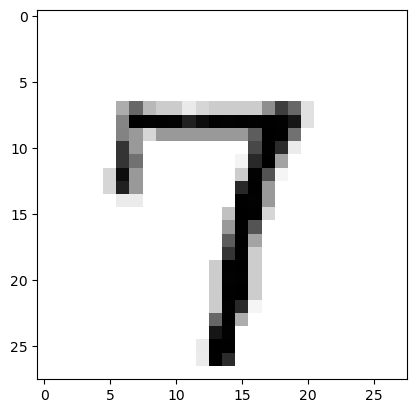

In [8]:
plt.imshow(X_train[6], cmap=plt.cm.binary)
plt.show()

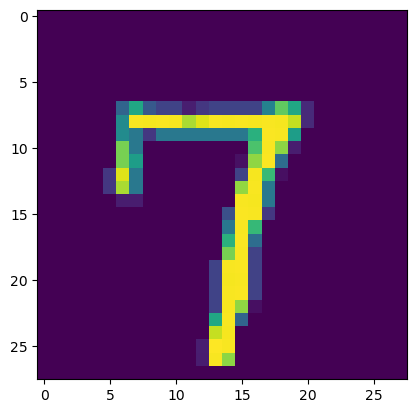

In [9]:
plt.imshow(X_train[6])
plt.show()

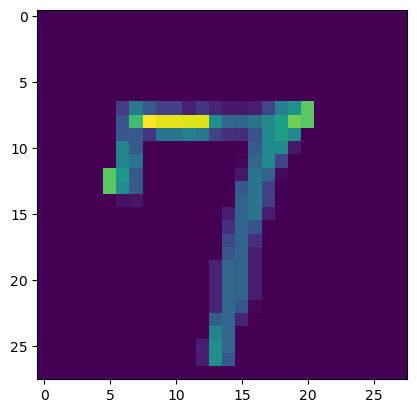

In [10]:
X_train=tf.keras.utils.normalize(X_train, axis=1)
X_test=tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[6])

In [11]:
print(y_train[6])

7


In [12]:
X_testr=np.array(X_test).reshape(-1,28,28,1)
X_trainr=np.array(X_train).reshape(-1,28,28,1)
print(X_testr.shape)
print(X_trainr.shape)

(28000, 28, 28, 1)
(42000, 28, 28, 1)


In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [25]:
model=Sequential()

First layer

In [26]:
model.add(Conv2D(64, (3,3), input_shape= X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

C:\ProgramData\anaconda34\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Layers from second to fourth

In [27]:
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

Fully connected Layer

In [29]:
model.add (Flatten())
model.add (Dense(64))
model.add (Activation("relu"))

In [30]:
model.add (Dense(32))
model.add (Activation("relu"))

In [31]:
model.add(Dense (10))
model.add (Activation('softmax'))

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])


In [36]:
model.fit(X_trainr,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7177 - loss: 0.8312 - val_accuracy: 0.9610 - val_loss: 0.1248
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9624 - loss: 0.1274 - val_accuracy: 0.9622 - val_loss: 0.1177
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9733 - loss: 0.0889 - val_accuracy: 0.9768 - val_loss: 0.0762
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9826 - loss: 0.0616 - val_accuracy: 0.9754 - val_loss: 0.0810
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9842 - loss: 0.0529 - val_accuracy: 0.9760 - val_loss: 0.0760
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9851 - loss: 0.0441 - val_accuracy: 0.9789 - val_loss: 0.0736
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9798 - val_loss: 0.0630
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9901 - loss: 0.0317 - 

In [37]:
predictions=model.predict([X_testr])

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


In [39]:
print(np.argmax(predictions[6]))

0


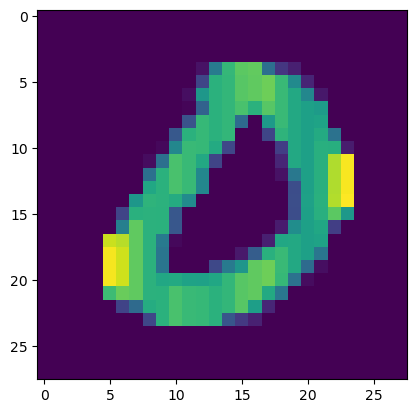

In [40]:
plt.imshow(X_test[6])

In [43]:
# Создайте DataFrame с предсказаниями
predictions_df = pd.DataFrame(predictions)



In [51]:
# Получите самое вероятное предсказание и его индекс для каждого примера
best_predictions = predictions.argmax(axis=1)

# Создайте DataFrame с результатами
result_df = pd.DataFrame({
    'ImageId': range(1, len(best_predictions)+1 ),
    'Label': best_predictions
})

In [52]:
# Просмотрите результат
print(result_df.head())

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


In [50]:
ex.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [53]:
result_df.to_csv('predictions.csv', index=False)